STROKE PREDICTION: NAIVE BAYES WITH SMOTE
Objective: Build interpretable stroke prediction model
Approach: Gaussian Naive Bayes + SMOTE for class imbalance
🚀 EXECUTING COMPLETE STROKE PREDICTION WORKFLOW

📚 PHASE 1: MODEL TRAINING

📁 LOADING ENGINEERED DATASET
----------------------------------------
Dataset shape: (5110, 28)
Features: 27
Samples: 5110

Target Variable Distribution:
No Stroke (0): 4,861 (95.1%)
Stroke (1): 249 (4.9%)
Imbalance Ratio: 19.5:1

✅ No missing values found

Dataset Info:
Memory usage: 1.02 MB


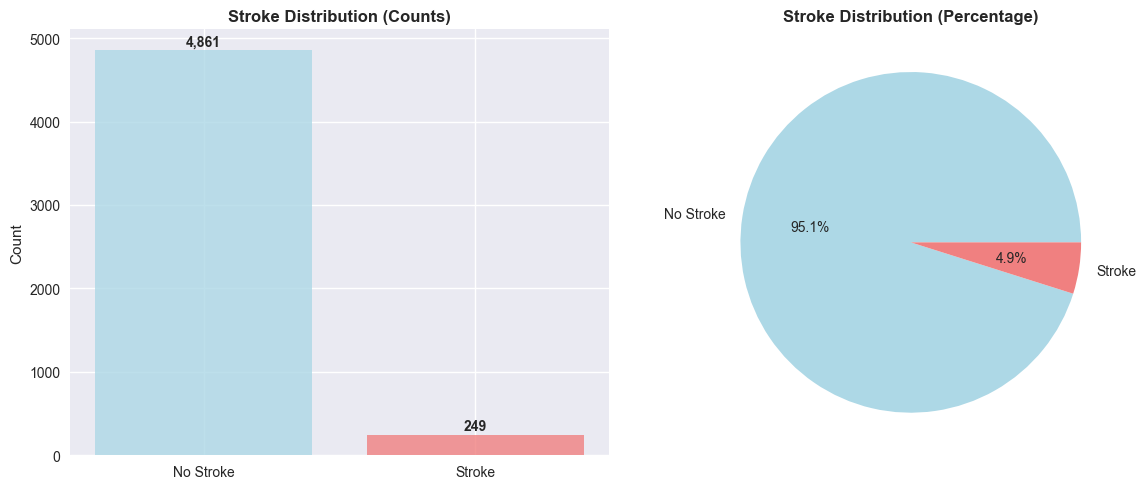


🔧 DATA PREPROCESSING
----------------------------------------
Features shape: (5110, 27)
Target shape: (5110,)

Categorical columns found: ['gender_Male', 'gender_Other']
Converted gender_Male from boolean to numeric
Converted gender_Other from boolean to numeric

Final feature set shape: (5110, 27)
Feature names: ['age_diabetes', 'cv_risk_count', 'age_decade', 'work_stress_level', 'hypertension_elderly', 'high_stress_work', 'hypertension', 'married', 'male_age_interaction', 'bmi_hypertension', 'age_hypertension_diabetes', 'bmi_glucose', 'heart_disease', 'bmi', 'age_high_risk', 'glucose_heart_disease', 'avg_glucose_level', 'gender_female', 'female_elderly', 'age_hypertension', 'age_obesity', 'age', 'gender_male', 'modifiable_risk_count', 'bmi_diabetes', 'gender_Male', 'gender_Other']

📊 FEATURE DISTRIBUTION ANALYSIS
----------------------------------------
Basic Statistics:
       age_diabetes  cv_risk_count  age_decade  work_stress_level  \
count      5110.000       5110.000    5110.

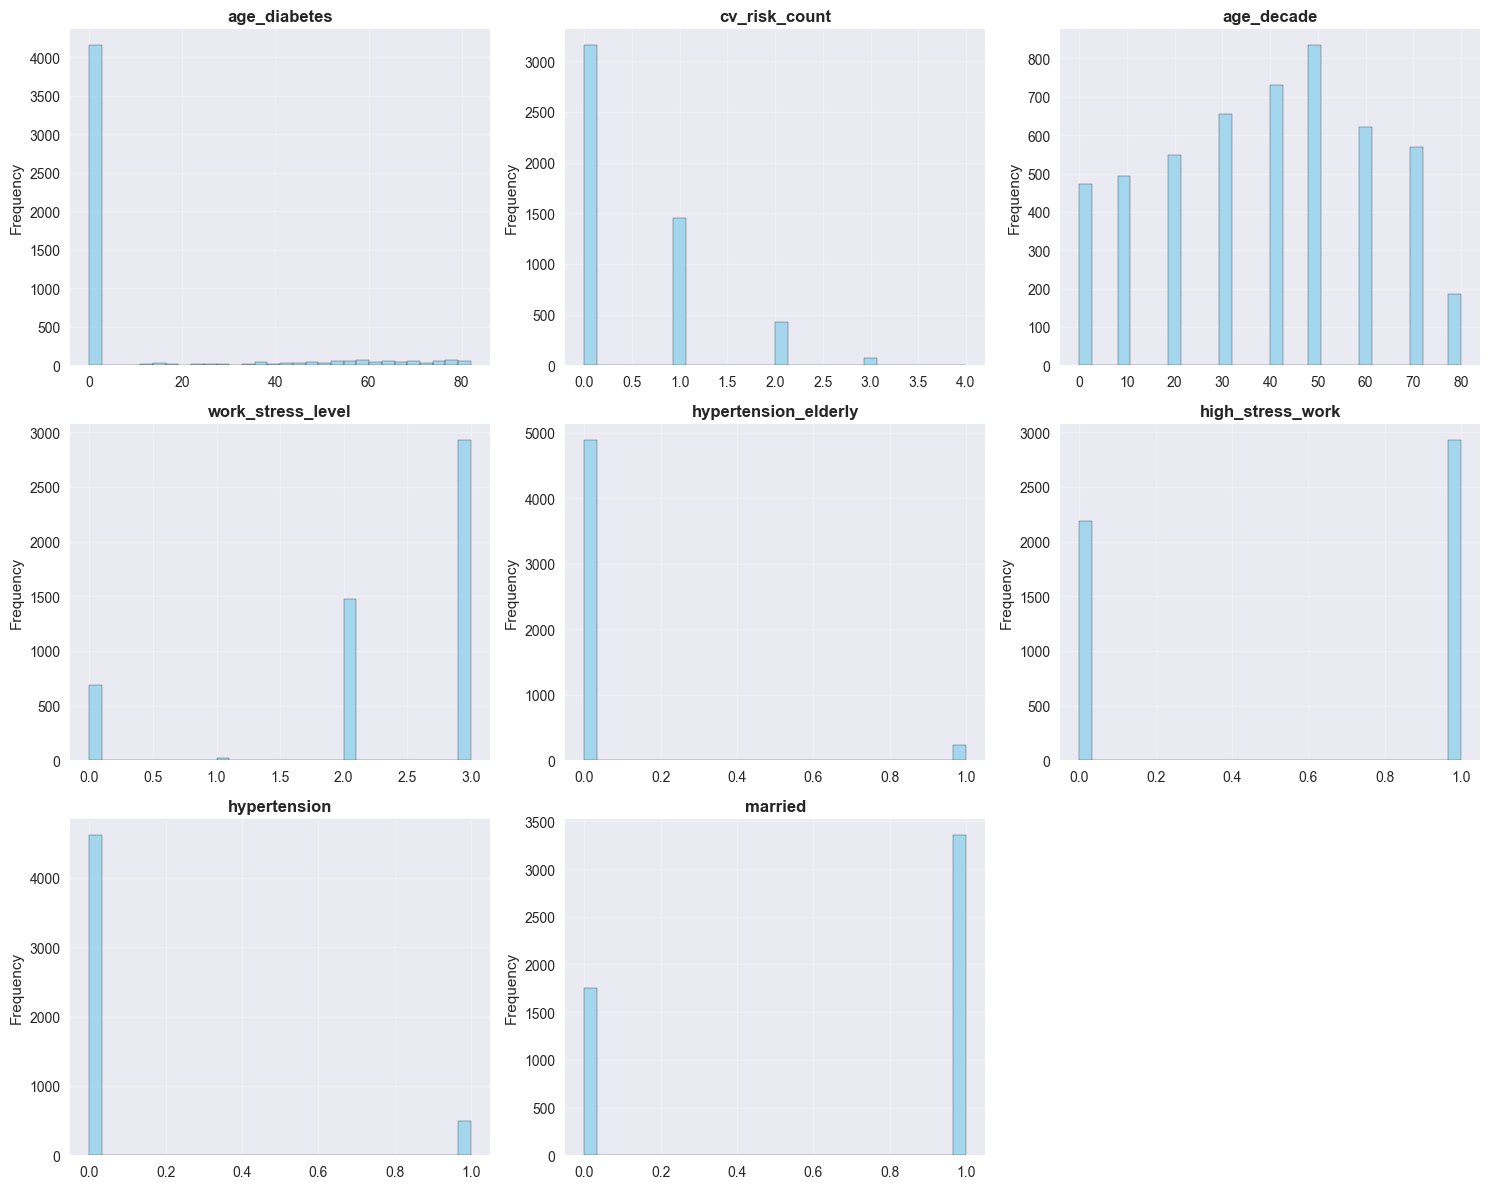


✂️  TRAIN-TEST SPLIT
----------------------------------------
Training set: 4088 samples
Test set: 1022 samples

Class distribution in training set:
No Stroke: 95.1%
Stroke: 4.9%

Class distribution in test set:
No Stroke: 95.1%
Stroke: 4.9%

🤖 NAIVE BAYES + SMOTE PIPELINE
----------------------------------------
Pipeline components:
1. StandardScaler - Feature scaling
2. SMOTE - Synthetic oversampling
3. GaussianNB - Naive Bayes classifier

🎯 MODEL TRAINING & EVALUATION
----------------------------------------
Training model...

📈 MODEL PERFORMANCE METRICS
------------------------------
Accuracy:  0.5861
Precision: 0.0919
Recall:    0.8400
F1-Score:  0.1657
ROC-AUC:   0.8125
PR-AUC:    0.1688

📊 PR-AUC ANALYSIS (Important for Imbalanced Data)
---------------------------------------------
PR-AUC Score:           0.1688
Baseline (Random):      0.0489
Improvement over Random: 0.1198
PR-AUC Quality:         Poor

🏥 Clinical Interpretation:
✅ Model significantly outperforms random screeni

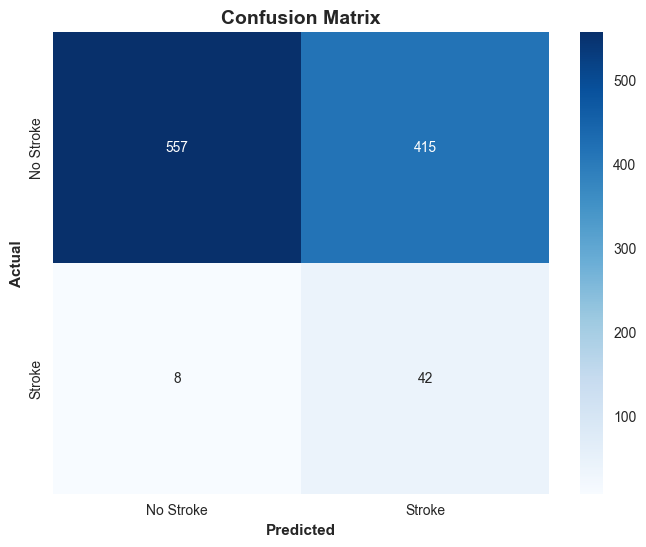


Confusion Matrix Analysis:
True Negatives:  557
False Positives: 415
False Negatives: 8
True Positives:  42
Specificity:     0.5730
Sensitivity:     0.8400


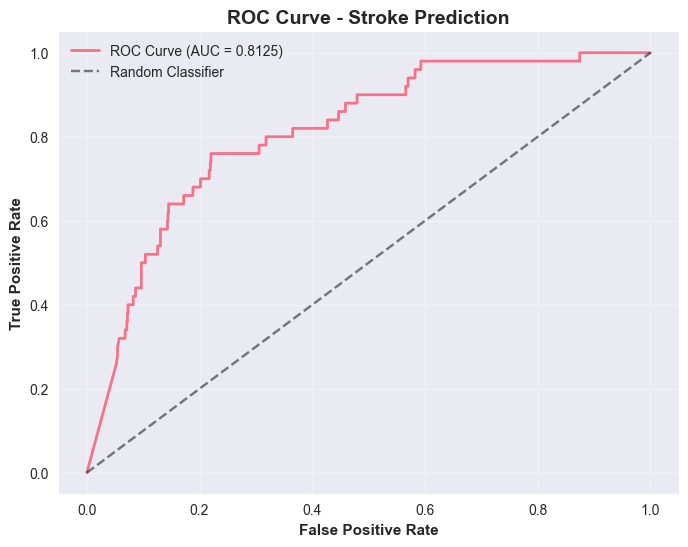

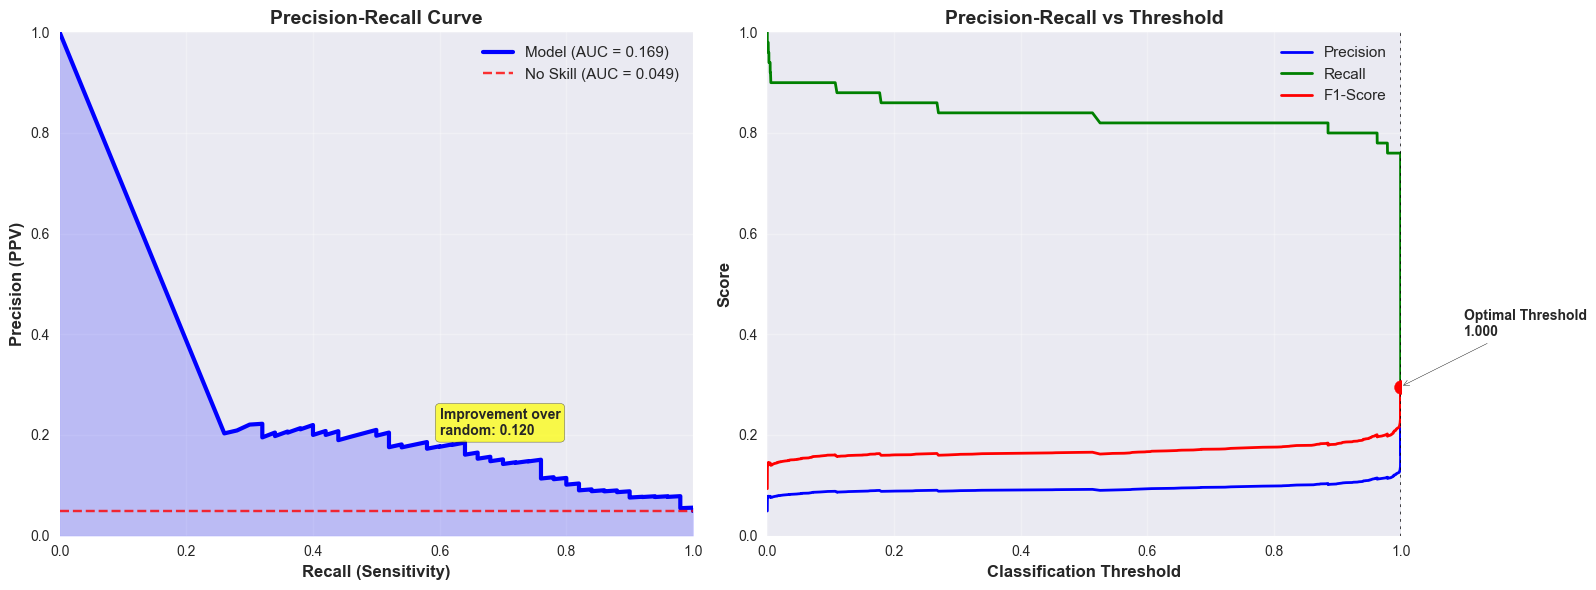


📊 PRECISION-RECALL CURVE ANALYSIS
----------------------------------------
PR-AUC Score:           0.1688
Baseline (No Skill):    0.0489
Improvement:            0.1198
Lift Factor:            3.45x

Optimal Operating Point:
  Threshold:            1.0000
  F1-Score:             0.2959
  Precision at optimal: 0.2101
  Recall at optimal:    0.5000

Clinical Threshold Analysis:
Threshold  Precision  Recall     F1-Score  
------------------------------------------
0.1        0.088      0.900      0.160     
0.2        0.088      0.860      0.160     
0.3        0.089      0.840      0.161     
0.5        0.092      0.840      0.165     

🏥 CLINICAL INTERPRETATION:
------------------------------
Performance Level: Poor performance, significant improvement needed
✅ Model significantly outperforms random screening
✅ Suitable for clinical implementation

🔍 FEATURE IMPORTANCE ANALYSIS
----------------------------------------
Top 15 Most Important Features:
-------------------------------------

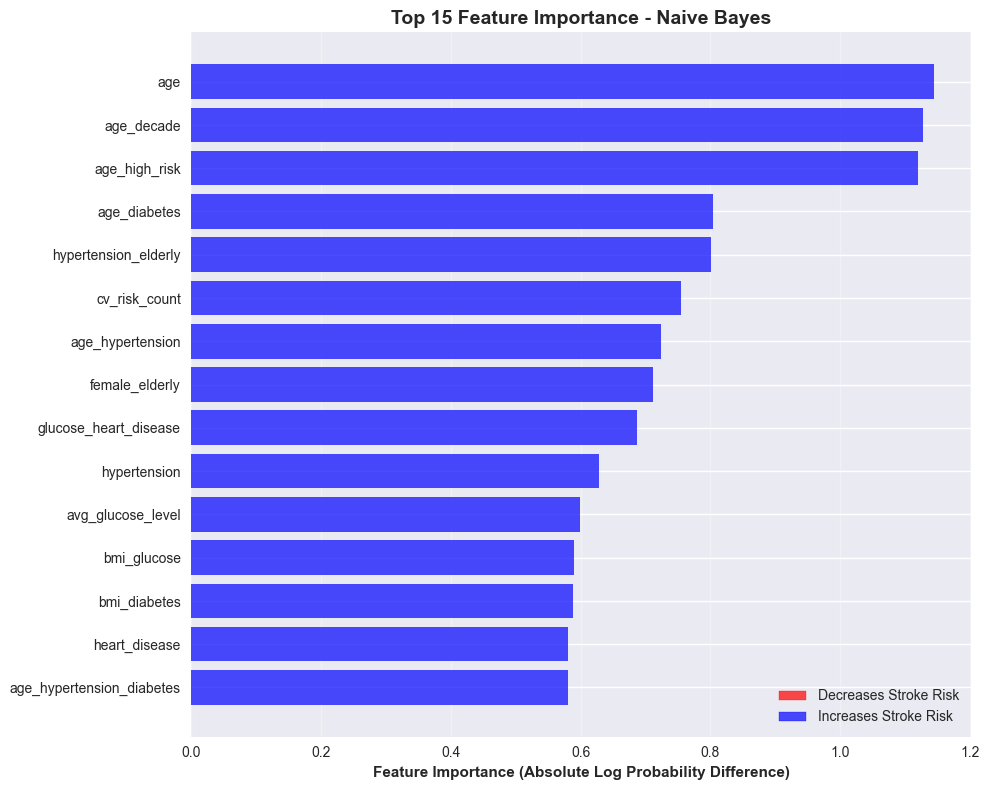


🏥 CLINICAL INSIGHTS & INTERPRETATION
📊 Model Performance Assessment:
  ROC-AUC: Good (0.813)
  PR-AUC:  Poor (0.169)
  Baseline PR-AUC: 0.049
  Improvement: 0.120 (3.4x lift)
✅ Model shows excellent discriminatory ability for stroke prediction
✅ Significantly outperforms random screening

⚖️  Imbalanced Dataset Considerations:
----------------------------------------
  Stroke prevalence: 4.9%
  • Very rare event - PR-AUC is more informative than ROC-AUC
  • High recall is critical to avoid missing strokes
  • False positives are acceptable for screening

🎯 Performance Trade-offs:
-------------------------
  Precision: 9.2% (when model predicts stroke, accuracy)
  Recall: 84.0% (% of actual strokes caught)
  ✅ High recall: Good at catching most stroke cases
  ⚠️  Low precision: Many false positives expected

🎯 Top Risk Factors (Features that increase stroke risk):
--------------------------------------------------
1. age (Importance: 1.1444)
2. age_decade (Importance: 1.1272)
3. age_hi

In [6]:
# Stroke Prediction: Naive Bayes with SMOTE
# ============================================
# A focused implementation using Naive Bayes classifier with SMOTE for class imbalance handling

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, 
    roc_curve, precision_recall_curve,
    accuracy_score, precision_score, recall_score, f1_score
)
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import average_precision_score

import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("=" * 60)
print("STROKE PREDICTION: NAIVE BAYES WITH SMOTE")
print("=" * 60)
print("Objective: Build interpretable stroke prediction model")
print("Approach: Gaussian Naive Bayes + SMOTE for class imbalance")
print("=" * 60)

# ============================================
# 1. DATA LOADING AND INITIAL EXPLORATION
# ============================================

def load_and_explore_data(file_path):
    """Load engineered dataset and perform initial exploration"""
    
    print("\n📁 LOADING ENGINEERED DATASET")
    print("-" * 40)
    
    # Load the data
    df = pd.read_csv(file_path)
    
    print(f"Dataset shape: {df.shape}")
    print(f"Features: {df.shape[1] - 1}")  # Assuming 'stroke' is target
    print(f"Samples: {df.shape[0]}")
    
    # Check target distribution
    if 'stroke' in df.columns:
        stroke_dist = df['stroke'].value_counts()
        stroke_pct = df['stroke'].value_counts(normalize=True) * 100
        
        print(f"\nTarget Variable Distribution:")
        print(f"No Stroke (0): {stroke_dist[0]:,} ({stroke_pct[0]:.1f}%)")
        print(f"Stroke (1): {stroke_dist[1]:,} ({stroke_pct[1]:.1f}%)")
        print(f"Imbalance Ratio: {stroke_dist[0]/stroke_dist[1]:.1f}:1")
    
    # Check for missing values
    missing_values = df.isnull().sum()
    if missing_values.sum() > 0:
        print(f"\n⚠️  Missing Values Found:")
        print(missing_values[missing_values > 0])
    else:
        print(f"\n✅ No missing values found")
    
    # Display basic info
    print(f"\nDataset Info:")
    print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    return df

def visualize_target_distribution(df):
    """Visualize target variable distribution"""
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Count plot
    stroke_counts = df['stroke'].value_counts()
    axes[0].bar(['No Stroke', 'Stroke'], stroke_counts.values, 
                color=['lightblue', 'lightcoral'], alpha=0.8)
    axes[0].set_title('Stroke Distribution (Counts)', fontweight='bold')
    axes[0].set_ylabel('Count')
    for i, v in enumerate(stroke_counts.values):
        axes[0].text(i, v + 50, f'{v:,}', ha='center', fontweight='bold')
    
    # Percentage plot
    stroke_pct = df['stroke'].value_counts(normalize=True) * 100
    axes[1].pie(stroke_pct.values, labels=['No Stroke', 'Stroke'], 
                autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
    axes[1].set_title('Stroke Distribution (Percentage)', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    return stroke_counts, stroke_pct

# ============================================
# 2. DATA PREPROCESSING
# ============================================

def prepare_features_and_target(df):
    """Prepare features and target for modeling"""
    
    print("\n🔧 DATA PREPROCESSING")
    print("-" * 40)
    
    # Separate features and target
    if 'stroke' in df.columns:
        X = df.drop('stroke', axis=1)
        y = df['stroke']
    else:
        raise ValueError("Target column 'stroke' not found in dataset")
    
    print(f"Features shape: {X.shape}")
    print(f"Target shape: {y.shape}")
    
    # Check for any categorical columns that need encoding
    categorical_cols = X.select_dtypes(include=['object', 'bool']).columns.tolist()
    if categorical_cols:
        print(f"\nCategorical columns found: {categorical_cols}")
        
        # Convert boolean columns to numeric
        for col in categorical_cols:
            if X[col].dtype == 'bool':
                X[col] = X[col].astype(int)
                print(f"Converted {col} from boolean to numeric")
    
    # Check for any remaining non-numeric columns
    non_numeric = X.select_dtypes(exclude=[np.number]).columns.tolist()
    if non_numeric:
        print(f"⚠️  Non-numeric columns remaining: {non_numeric}")
        # Handle any remaining categorical variables
        for col in non_numeric:
            if X[col].nunique() <= 10:  # Assume small cardinality for dummy encoding
                dummies = pd.get_dummies(X[col], prefix=col, drop_first=True)
                X = X.drop(col, axis=1)
                X = pd.concat([X, dummies], axis=1)
                print(f"One-hot encoded {col}")
    
    print(f"\nFinal feature set shape: {X.shape}")
    print(f"Feature names: {list(X.columns)}")
    
    return X, y

def analyze_feature_distributions(X, feature_subset=None):
    """Analyze distribution of key features"""
    
    if feature_subset is None:
        # Select a subset of features for visualization
        feature_subset = X.columns[:8]  # First 8 features
    
    print(f"\n📊 FEATURE DISTRIBUTION ANALYSIS")
    print("-" * 40)
    
    # Calculate basic statistics
    stats = X[feature_subset].describe()
    print("Basic Statistics:")
    print(stats.round(3))
    
    # Visualize distributions
    n_features = len(feature_subset)
    n_cols = 3
    n_rows = (n_features + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes]
    
    for i, feature in enumerate(feature_subset):
        if i < len(axes):
            axes[i].hist(X[feature], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
            axes[i].set_title(f'{feature}', fontweight='bold')
            axes[i].set_ylabel('Frequency')
            axes[i].grid(True, alpha=0.3)
    
    # Hide empty subplots
    for i in range(len(feature_subset), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

# ============================================
# 3. TRAIN-TEST SPLIT
# ============================================

def create_train_test_split(X, y, test_size=0.2, random_state=42):
    """Create stratified train-test split"""
    
    print("\n✂️  TRAIN-TEST SPLIT")
    print("-" * 40)
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )
    
    print(f"Training set: {X_train.shape[0]} samples")
    print(f"Test set: {X_test.shape[0]} samples")
    
    # Check class distribution in splits
    train_dist = y_train.value_counts(normalize=True) * 100
    test_dist = y_test.value_counts(normalize=True) * 100
    
    print(f"\nClass distribution in training set:")
    print(f"No Stroke: {train_dist[0]:.1f}%")
    print(f"Stroke: {train_dist[1]:.1f}%")
    
    print(f"\nClass distribution in test set:")
    print(f"No Stroke: {test_dist[0]:.1f}%")
    print(f"Stroke: {test_dist[1]:.1f}%")
    
    return X_train, X_test, y_train, y_test

# ============================================
# 4. NAIVE BAYES WITH SMOTE PIPELINE
# ============================================

def create_nb_smote_pipeline(random_state=42):
    """Create Naive Bayes pipeline with SMOTE"""
    
    print("\n🤖 NAIVE BAYES + SMOTE PIPELINE")
    print("-" * 40)
    
    # Create pipeline with SMOTE and Naive Bayes
    pipeline = ImbPipeline([
        ('scaler', StandardScaler()),  # Scale features for SMOTE
        ('smote', SMOTE(random_state=random_state, k_neighbors=5)),
        ('classifier', GaussianNB())
    ])
    
    print("Pipeline components:")
    print("1. StandardScaler - Feature scaling")
    print("2. SMOTE - Synthetic oversampling")
    print("3. GaussianNB - Naive Bayes classifier")
    
    return pipeline

def train_and_evaluate_model(pipeline, X_train, X_test, y_train, y_test):
    """Train model and perform comprehensive evaluation"""
    
    print("\n🎯 MODEL TRAINING & EVALUATION")
    print("-" * 40)
    
    # Train the model
    print("Training model...")
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    pr_auc = average_precision_score(y_test, y_pred_proba)
    
    print(f"\n📈 MODEL PERFORMANCE METRICS")
    print("-" * 30)
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    print(f"ROC-AUC:   {auc:.4f}")
    print(f"PR-AUC:    {pr_auc:.4f}")
    
    # PR-AUC interpretation for imbalanced datasets
    baseline_pr = y_test.mean()  # Random classifier PR-AUC
    pr_improvement = pr_auc - baseline_pr
    
    print(f"\n📊 PR-AUC ANALYSIS (Important for Imbalanced Data)")
    print("-" * 45)
    print(f"PR-AUC Score:           {pr_auc:.4f}")
    print(f"Baseline (Random):      {baseline_pr:.4f}")
    print(f"Improvement over Random: {pr_improvement:.4f}")
    
    if pr_auc >= 0.8:
        pr_quality = "Excellent"
    elif pr_auc >= 0.6:
        pr_quality = "Good"
    elif pr_auc >= 0.4:
        pr_quality = "Fair"
    else:
        pr_quality = "Poor"
    
    print(f"PR-AUC Quality:         {pr_quality}")
    
    # Clinical interpretation
    print(f"\n🏥 Clinical Interpretation:")
    if pr_auc > baseline_pr * 2:
        print("✅ Model significantly outperforms random screening")
    elif pr_auc > baseline_pr * 1.5:
        print("✅ Model shows good improvement over random screening")
    else:
        print("⚠️  Model shows limited improvement over random screening")
    
    # Classification report
    print(f"\n📋 DETAILED CLASSIFICATION REPORT")
    print("-" * 40)
    print(classification_report(y_test, y_pred, target_names=['No Stroke', 'Stroke']))
    
    return {
        'model': pipeline,
        'predictions': y_pred,
        'probabilities': y_pred_proba,
        'metrics': {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'auc': auc,
            'pr_auc': pr_auc,
            'baseline_pr': baseline_pr,
            'pr_improvement': pr_improvement
        }
    }



# ============================================
# 5. CROSS-VALIDATION
# ============================================

def perform_cross_validation(pipeline, X, y, cv_folds=5):
    """Perform cross-validation for robust evaluation"""
    
    print(f"\n🔄 {cv_folds}-FOLD CROSS-VALIDATION")
    print("-" * 40)
    
    # Stratified K-fold for imbalanced data
    skf = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)
    
    # Cross-validation scores for multiple metrics
    cv_roc_scores = cross_val_score(pipeline, X, y, cv=skf, scoring='roc_auc')
    cv_pr_scores = cross_val_score(pipeline, X, y, cv=skf, scoring='average_precision')
    
    print(f"Cross-validation ROC-AUC scores:")
    for i, score in enumerate(cv_roc_scores, 1):
        print(f"Fold {i}: {score:.4f}")
    
    print(f"\nCross-validation PR-AUC scores:")
    for i, score in enumerate(cv_pr_scores, 1):
        print(f"Fold {i}: {score:.4f}")
    
    print(f"\n📊 CROSS-VALIDATION SUMMARY:")
    print("-" * 30)
    print(f"ROC-AUC:")
    print(f"  Mean: {cv_roc_scores.mean():.4f} ± {cv_roc_scores.std():.4f}")
    print(f"  Range: {cv_roc_scores.min():.4f} - {cv_roc_scores.max():.4f}")
    
    print(f"PR-AUC:")
    print(f"  Mean: {cv_pr_scores.mean():.4f} ± {cv_pr_scores.std():.4f}")
    print(f"  Range: {cv_pr_scores.min():.4f} - {cv_pr_scores.max():.4f}")
    
    # Calculate baseline PR-AUC (prevalence rate)
    baseline_pr = y.mean()
    pr_improvement = cv_pr_scores.mean() - baseline_pr
    
    print(f"\nPR-AUC Analysis:")
    print(f"  Baseline (prevalence): {baseline_pr:.4f}")
    print(f"  Improvement: {pr_improvement:.4f}")
    print(f"  Lift factor: {cv_pr_scores.mean() / baseline_pr:.2f}x")
    
    # Stability assessment
    roc_cv = cv_roc_scores.std() / cv_roc_scores.mean()
    pr_cv = cv_pr_scores.std() / cv_pr_scores.mean()
    
    print(f"\nStability Assessment:")
    print(f"  ROC-AUC CV: {roc_cv:.3f}")
    print(f"  PR-AUC CV:  {pr_cv:.3f}")
    
    if max(roc_cv, pr_cv) < 0.05:
        stability = "Very stable"
    elif max(roc_cv, pr_cv) < 0.10:
        stability = "Stable"
    else:
        stability = "Moderate stability"
    
    print(f"  Overall: {stability}")
    
    return {
        'roc_auc_scores': cv_roc_scores,
        'pr_auc_scores': cv_pr_scores,
        'baseline_pr': baseline_pr
    }

# ============================================
# 6. VISUALIZATION FUNCTIONS
# ============================================

def plot_confusion_matrix(y_test, y_pred):
    """Plot confusion matrix"""
    
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No Stroke', 'Stroke'],
                yticklabels=['No Stroke', 'Stroke'])
    plt.title('Confusion Matrix', fontweight='bold', fontsize=14)
    plt.xlabel('Predicted', fontweight='bold')
    plt.ylabel('Actual', fontweight='bold')
    plt.show()
    
    # Calculate additional metrics from confusion matrix
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)
    
    print(f"\nConfusion Matrix Analysis:")
    print(f"True Negatives:  {tn}")
    print(f"False Positives: {fp}")
    print(f"False Negatives: {fn}")
    print(f"True Positives:  {tp}")
    print(f"Specificity:     {specificity:.4f}")
    print(f"Sensitivity:     {sensitivity:.4f}")

def plot_roc_curve(y_test, y_pred_proba):
    """Plot ROC curve"""
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.4f})', linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', alpha=0.5)
    plt.xlabel('False Positive Rate', fontweight='bold')
    plt.ylabel('True Positive Rate', fontweight='bold')
    plt.title('ROC Curve - Stroke Prediction', fontweight='bold', fontsize=14)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

def plot_precision_recall_curve(y_test, y_pred_proba):
    """Plot comprehensive Precision-Recall curve with detailed analysis"""
    
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = average_precision_score(y_test, y_pred_proba)
    baseline_pr = y_test.mean()  # No-skill classifier
    
    # Create subplot figure
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Plot 1: Precision-Recall Curve
    axes[0].plot(recall, precision, linewidth=3, label=f'Model (AUC = {pr_auc:.3f})', color='blue')
    axes[0].axhline(y=baseline_pr, color='red', linestyle='--', alpha=0.8, 
                    label=f'No Skill (AUC = {baseline_pr:.3f})')
    
    # Fill area under curve
    axes[0].fill_between(recall, precision, alpha=0.2, color='blue')
    
    axes[0].set_xlabel('Recall (Sensitivity)', fontweight='bold', fontsize=12)
    axes[0].set_ylabel('Precision (PPV)', fontweight='bold', fontsize=12)
    axes[0].set_title('Precision-Recall Curve', fontweight='bold', fontsize=14)
    axes[0].legend(fontsize=11)
    axes[0].grid(True, alpha=0.3)
    axes[0].set_xlim([0, 1])
    axes[0].set_ylim([0, 1])
    
    # Add performance annotations
    axes[0].text(0.6, 0.2, f'Improvement over\nrandom: {pr_auc - baseline_pr:.3f}', 
                bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7),
                fontsize=10, fontweight='bold')
    
    # Plot 2: Precision-Recall vs Threshold
    axes[1].plot(thresholds, precision[:-1], label='Precision', color='blue', linewidth=2)
    axes[1].plot(thresholds, recall[:-1], label='Recall', color='green', linewidth=2)
    
    # Calculate F1 scores for all thresholds
    f1_scores = 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1])
    axes[1].plot(thresholds, f1_scores, label='F1-Score', color='red', linewidth=2)
    
    # Find optimal threshold
    optimal_idx = np.argmax(f1_scores)
    optimal_threshold = thresholds[optimal_idx]
    optimal_f1 = f1_scores[optimal_idx]
    
    # Mark optimal threshold
    axes[1].axvline(x=optimal_threshold, color='black', linestyle=':', alpha=0.8, linewidth=2)
    axes[1].scatter([optimal_threshold], [optimal_f1], color='red', s=100, zorder=5)
    axes[1].annotate(f'Optimal Threshold\n{optimal_threshold:.3f}', 
                    xy=(optimal_threshold, optimal_f1), 
                    xytext=(optimal_threshold + 0.1, optimal_f1 + 0.1),
                    arrowprops=dict(arrowstyle='->', color='black'),
                    fontsize=10, fontweight='bold')
    
    axes[1].set_xlabel('Classification Threshold', fontweight='bold', fontsize=12)
    axes[1].set_ylabel('Score', fontweight='bold', fontsize=12)
    axes[1].set_title('Precision-Recall vs Threshold', fontweight='bold', fontsize=14)
    axes[1].legend(fontsize=11)
    axes[1].grid(True, alpha=0.3)
    axes[1].set_xlim([0, 1])
    axes[1].set_ylim([0, 1])
    
    plt.tight_layout()
    plt.show()
    
    # Detailed threshold analysis
    print(f"\n📊 PRECISION-RECALL CURVE ANALYSIS")
    print("-" * 40)
    print(f"PR-AUC Score:           {pr_auc:.4f}")
    print(f"Baseline (No Skill):    {baseline_pr:.4f}")
    print(f"Improvement:            {pr_auc - baseline_pr:.4f}")
    print(f"Lift Factor:            {pr_auc / baseline_pr:.2f}x")
    
    print(f"\nOptimal Operating Point:")
    print(f"  Threshold:            {optimal_threshold:.4f}")
    print(f"  F1-Score:             {optimal_f1:.4f}")
    print(f"  Precision at optimal: {precision[optimal_idx]:.4f}")
    print(f"  Recall at optimal:    {recall[optimal_idx]:.4f}")
    
    # Clinical thresholds analysis
    clinical_thresholds = [0.1, 0.2, 0.3, 0.5]
    print(f"\nClinical Threshold Analysis:")
    print(f"{'Threshold':<10} {'Precision':<10} {'Recall':<10} {'F1-Score':<10}")
    print("-" * 42)
    
    for threshold in clinical_thresholds:
        # Find closest threshold index
        closest_idx = np.argmin(np.abs(thresholds - threshold))
        if closest_idx < len(precision) - 1:
            prec = precision[closest_idx]
            rec = recall[closest_idx]
            f1 = 2 * (prec * rec) / (prec + rec) if (prec + rec) > 0 else 0
            print(f"{threshold:<10.1f} {prec:<10.3f} {rec:<10.3f} {f1:<10.3f}")
    
    # Performance interpretation
    print(f"\n🏥 CLINICAL INTERPRETATION:")
    print("-" * 30)
    
    if pr_auc >= 0.8:
        interpretation = "Excellent discrimination for stroke prediction"
    elif pr_auc >= 0.6:
        interpretation = "Good performance for clinical screening"
    elif pr_auc >= 0.4:
        interpretation = "Moderate performance, may need improvement"
    else:
        interpretation = "Poor performance, significant improvement needed"
    
    print(f"Performance Level: {interpretation}")
    
    # Recommendations based on PR-AUC
    if pr_auc > baseline_pr * 3:
        print("✅ Model significantly outperforms random screening")
        print("✅ Suitable for clinical implementation")
    elif pr_auc > baseline_pr * 2:
        print("✅ Model shows good improvement over random screening")
        print("⚠️  Consider additional validation before deployment")
    else:
        print("⚠️  Limited improvement over random screening")
        print("❌ May not be clinically useful in current form")
    
    return {
        'pr_auc': pr_auc,
        'baseline_pr': baseline_pr,
        'optimal_threshold': optimal_threshold,
        'optimal_f1': optimal_f1,
        'precision_at_optimal': precision[optimal_idx],
        'recall_at_optimal': recall[optimal_idx]
    }



# ============================================
# 7. FEATURE IMPORTANCE ANALYSIS
# ============================================

def analyze_feature_importance(model, feature_names, top_n=15):
    """Analyze feature importance for Naive Bayes"""
    
    print(f"\n🔍 FEATURE IMPORTANCE ANALYSIS")
    print("-" * 40)
    
    # For Naive Bayes, we can look at the feature log probabilities
    nb_classifier = model.named_steps['classifier']
    
    # Calculate feature importance as the difference in log probabilities
    log_prob_diff = nb_classifier.theta_[1] - nb_classifier.theta_[0]
    
    # Create feature importance dataframe
    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': np.abs(log_prob_diff),
        'log_prob_diff': log_prob_diff
    }).sort_values('importance', ascending=False)
    
    print(f"Top {top_n} Most Important Features:")
    print("-" * 40)
    for i, (idx, row) in enumerate(feature_importance.head(top_n).iterrows(), 1):
        direction = "↑" if row['log_prob_diff'] > 0 else "↓"
        print(f"{i:2d}. {row['feature']:25s} {direction} {row['importance']:.4f}")
    
    # Plot feature importance
    plt.figure(figsize=(10, 8))
    top_features = feature_importance.head(top_n)
    
    colors = ['red' if x < 0 else 'blue' for x in top_features['log_prob_diff']]
    
    plt.barh(range(len(top_features)), top_features['importance'], color=colors, alpha=0.7)
    plt.yticks(range(len(top_features)), top_features['feature'])
    plt.xlabel('Feature Importance (Absolute Log Probability Difference)', fontweight='bold')
    plt.title(f'Top {top_n} Feature Importance - Naive Bayes', fontweight='bold', fontsize=14)
    plt.gca().invert_yaxis()
    plt.grid(True, alpha=0.3, axis='x')
    
    # Add legend
    red_patch = plt.Rectangle((0,0),1,1, color='red', alpha=0.7, label='Decreases Stroke Risk')
    blue_patch = plt.Rectangle((0,0),1,1, color='blue', alpha=0.7, label='Increases Stroke Risk')
    plt.legend(handles=[red_patch, blue_patch])
    
    plt.tight_layout()
    plt.show()
    
    return feature_importance

# ============================================
# 8. CLINICAL INSIGHTS AND INTERPRETATION
# ============================================

def generate_clinical_insights(feature_importance, model_metrics):
    """Generate clinical insights from the model"""
    
    print(f"\n🏥 CLINICAL INSIGHTS & INTERPRETATION")
    print("=" * 50)
    
    # Model performance interpretation
    auc = model_metrics['auc']
    pr_auc = model_metrics['pr_auc']
    baseline_pr = model_metrics['baseline_pr']
    
    if auc >= 0.9:
        performance_level = "Excellent"
    elif auc >= 0.8:
        performance_level = "Good"
    elif auc >= 0.7:
        performance_level = "Fair"
    else:
        performance_level = "Poor"
    
    print(f"📊 Model Performance Assessment:")
    print(f"  ROC-AUC: {performance_level} ({auc:.3f})")
    
    # PR-AUC specific interpretation
    pr_lift = pr_auc / baseline_pr if baseline_pr > 0 else 0
    
    if pr_auc >= 0.8:
        pr_performance = "Excellent"
    elif pr_auc >= 0.6:
        pr_performance = "Good"
    elif pr_auc >= 0.4:
        pr_performance = "Fair"
    else:
        pr_performance = "Poor"
    
    print(f"  PR-AUC:  {pr_performance} ({pr_auc:.3f})")
    print(f"  Baseline PR-AUC: {baseline_pr:.3f}")
    print(f"  Improvement: {pr_auc - baseline_pr:.3f} ({pr_lift:.1f}x lift)")
    
    if auc >= 0.7 and pr_auc > baseline_pr * 2:
        print("✅ Model shows excellent discriminatory ability for stroke prediction")
        print("✅ Significantly outperforms random screening")
    elif auc >= 0.7:
        print("✅ Model shows good discriminatory ability")
        print("⚠️  PR-AUC suggests moderate improvement over random screening")
    else:
        print("⚠️  Model may need improvement for clinical use")
    
    # Imbalanced dataset insights
    print(f"\n⚖️  Imbalanced Dataset Considerations:")
    print("-" * 40)
    print(f"  Stroke prevalence: {baseline_pr:.1%}")
    
    if baseline_pr < 0.1:
        print("  • Very rare event - PR-AUC is more informative than ROC-AUC")
        print("  • High recall is critical to avoid missing strokes")
        print("  • False positives are acceptable for screening")
    
    precision = model_metrics['precision']
    recall = model_metrics['recall']
    
    print(f"\n🎯 Performance Trade-offs:")
    print("-" * 25)
    print(f"  Precision: {precision:.1%} (when model predicts stroke, accuracy)")
    print(f"  Recall: {recall:.1%} (% of actual strokes caught)")
    
    if recall >= 0.8:
        print("  ✅ High recall: Good at catching most stroke cases")
    else:
        print("  ⚠️  Lower recall: May miss some stroke cases")
    
    if precision >= 0.2:
        print("  ✅ Reasonable precision for rare disease screening")
    elif precision >= 0.1:
        print("  ⚠️  Moderate precision: Acceptable for initial screening")
    else:
        print("  ⚠️  Low precision: Many false positives expected")
    
    # Top risk factors
    print(f"\n🎯 Top Risk Factors (Features that increase stroke risk):")
    print("-" * 50)
    
    top_risk_factors = feature_importance[
        feature_importance['log_prob_diff'] > 0
    ].head(5)
    
    for i, (idx, row) in enumerate(top_risk_factors.iterrows(), 1):
        print(f"{i}. {row['feature']} (Importance: {row['importance']:.4f})")
    
    # Protective factors
    print(f"\n🛡️  Protective Factors (Features that decrease stroke risk):")
    print("-" * 50)
    
    protective_factors = feature_importance[
        feature_importance['log_prob_diff'] < 0
    ].head(5)
    
    for i, (idx, row) in enumerate(protective_factors.iterrows(), 1):
        print(f"{i}. {row['feature']} (Importance: {row['importance']:.4f})")
    
    # Clinical recommendations
    print(f"\n💡 Clinical Recommendations:")
    print("-" * 50)
    
    if pr_auc > baseline_pr * 3:
        print("1. ✅ Model ready for clinical screening implementation")
        print("2. Use as first-line screening tool for stroke risk")
        print("3. Implement in population health programs")
    elif pr_auc > baseline_pr * 2:
        print("1. ⚠️  Model suitable for pilot clinical programs")
        print("2. Validate performance in target population")
        print("3. Consider ensemble with other risk scores")
    else:
        print("1. ❌ Model needs improvement before clinical use")
        print("2. Consider additional features or different algorithms")
        print("3. Increase training data size")
    
    print("4. Focus on monitoring patients with high-importance risk factors")
    print("5. Use model predictions as supplementary decision support")
    print("6. Validate predictions with clinical judgment")
    
    # Model limitations
    print(f"\n⚠️  Model Limitations:")
    print("-" * 50)
    print("1. Based on observational data - causation not established")
    print("2. Performance may vary across different populations")
    print("3. Should complement, not replace, clinical assessment")
    print("4. Regular retraining needed with new data")
    print("5. PR-AUC more relevant than ROC-AUC for this rare outcome")

# ============================================
# 9. MAIN EXECUTION FUNCTION
# ============================================

def main_analysis(file_path='final_engineered_dataset.csv'):
    """Main function to execute the complete analysis"""
    
    try:
        # 1. Load and explore data
        df = load_and_explore_data(file_path)
        visualize_target_distribution(df)
        
        # 2. Prepare features and target
        X, y = prepare_features_and_target(df)
        analyze_feature_distributions(X)
        
        # 3. Create train-test split
        X_train, X_test, y_train, y_test = create_train_test_split(X, y)
        
        # 4. Create and train model
        pipeline = create_nb_smote_pipeline()
        results = train_and_evaluate_model(pipeline, X_train, X_test, y_train, y_test)
        
        # 5. Cross-validation
        cv_results = perform_cross_validation(pipeline, X, y)
        
        # 6. Visualizations
        plot_confusion_matrix(y_test, results['predictions'])
        plot_roc_curve(y_test, results['probabilities'])
        pr_analysis = plot_precision_recall_curve(y_test, results['probabilities'])
       
        
        # 7. Feature importance analysis
        feature_importance = analyze_feature_importance(
            results['model'], X.columns.tolist()
        )
        
        # 8. Clinical insights
        generate_clinical_insights(feature_importance, results['metrics'])
        
        print(f"\n🎉 ANALYSIS COMPLETE!")
        print("=" * 50)
        print("Key Deliverables:")
        print("✅ Trained Naive Bayes model with SMOTE")
        print("✅ Comprehensive performance evaluation")
        print("✅ Feature importance analysis")
        print("✅ Clinical insights and recommendations")
        
        return {
            'model': results['model'],
            'metrics': results['metrics'],
            'feature_importance': feature_importance,
            'cv_results': cv_results,
            'pr_analysis': pr_analysis
        }
        
    except Exception as e:
        print(f"❌ Error in analysis: {str(e)}")
        raise

# ============================================
# 10. MODEL SAVING AND PERSISTENCE
# ============================================

import joblib
import json
from datetime import datetime
import os

def save_model_and_metadata(results, X_columns, model_dir='saved_model'):
    """Save trained model with comprehensive metadata"""
    
    print(f"\n💾 SAVING MODEL AND METADATA")
    print("-" * 40)
    
    # Create directory if it doesn't exist
    os.makedirs(model_dir, exist_ok=True)
    
    # 1. Save the trained pipeline
    model_path = os.path.join(model_dir, 'stroke_prediction_nb_smote.pkl')
    joblib.dump(results['model'], model_path)
    print(f"✅ Model saved: {model_path}")
    
    # 2. Save feature names
    feature_names_path = os.path.join(model_dir, 'feature_names.json')
    with open(feature_names_path, 'w') as f:
        json.dump(list(X_columns), f, indent=2)
    print(f"✅ Feature names saved: {feature_names_path}")
    
    # 3. Save model metadata
    metadata = {
        'model_type': 'Naive Bayes with SMOTE',
        'training_date': datetime.now().isoformat(),
        'feature_count': len(X_columns),
        'pipeline_steps': [
            'StandardScaler',
            'SMOTE',
            'GaussianNB'
        ],
        'performance_metrics': results['metrics'],
        'cv_scores': {
            'mean_roc_auc': float(results['cv_results']['roc_auc_scores'].mean()),
            'std_roc_auc': float(results['cv_results']['roc_auc_scores'].std()),
            'mean_pr_auc': float(results['cv_results']['pr_auc_scores'].mean()),
            'std_pr_auc': float(results['cv_results']['pr_auc_scores'].std()),
            'individual_roc_scores': results['cv_results']['roc_auc_scores'].tolist(),
            'individual_pr_scores': results['cv_results']['pr_auc_scores'].tolist(),
            'baseline_pr': float(results['cv_results']['baseline_pr'])
        },
        'model_version': '1.0'
    }
    
    metadata_path = os.path.join(model_dir, 'model_metadata.json')
    with open(metadata_path, 'w') as f:
        json.dump(metadata, f, indent=2)
    print(f"✅ Metadata saved: {metadata_path}")
    
    # 4. Save feature importance
    feature_importance_path = os.path.join(model_dir, 'feature_importance.csv')
    results['feature_importance'].to_csv(feature_importance_path, index=False)
    print(f"✅ Feature importance saved: {feature_importance_path}")
    
    # 5. Create model summary
    summary = f"""
STROKE PREDICTION MODEL SUMMARY
================================
Model Type: Naive Bayes with SMOTE
Training Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
Performance: ROC-AUC = {results['metrics']['auc']:.4f}

Key Files:
- Model: stroke_prediction_nb_smote.pkl
- Features: feature_names.json  
- Metadata: model_metadata.json
- Importance: feature_importance.csv

To use this model for predictions:
1. Load the model using joblib.load()
2. Ensure input features match feature_names.json
3. Use model.predict_proba() for risk scores
"""
    
    summary_path = os.path.join(model_dir, 'README.txt')
    with open(summary_path, 'w') as f:
        f.write(summary)
    print(f"✅ Summary saved: {summary_path}")
    
    print(f"\n🎉 All model artifacts saved to: {model_dir}/")
    return model_dir

# ============================================
# 11. PREDICTION INTERFACE CLASS
# ============================================

class StrokePredictionModel:
    """
    Production-ready interface for stroke prediction using saved model
    """
    
    def __init__(self, model_dir='saved_model'):
        """Initialize predictor with saved model"""
        self.model_dir = model_dir
        self.model = None
        self.feature_names = None
        self.metadata = None
        self.feature_importance = None
        
        self._load_model_artifacts()
    
    def _load_model_artifacts(self):
        """Load all model artifacts"""
        
        try:
            # Load trained model
            model_path = os.path.join(self.model_dir, 'stroke_prediction_nb_smote.pkl')
            self.model = joblib.load(model_path)
            
            # Load feature names
            feature_names_path = os.path.join(self.model_dir, 'feature_names.json')
            with open(feature_names_path, 'r') as f:
                self.feature_names = json.load(f)
            
            # Load metadata
            metadata_path = os.path.join(self.model_dir, 'model_metadata.json')
            with open(metadata_path, 'r') as f:
                self.metadata = json.load(f)
            
            # Load feature importance
            importance_path = os.path.join(self.model_dir, 'feature_importance.csv')
            self.feature_importance = pd.read_csv(importance_path)
            
            print(f"✅ Model loaded successfully!")
            print(f"   - Model type: {self.metadata['model_type']}")
            print(f"   - Training date: {self.metadata['training_date']}")
            print(f"   - Performance (AUC): {self.metadata['performance_metrics']['auc']:.4f}")
            print(f"   - Features: {len(self.feature_names)}")
            
        except Exception as e:
            raise Exception(f"Failed to load model: {str(e)}")
    
    def validate_input(self, input_data):
        """Validate input data format and features"""
        
        if isinstance(input_data, dict):
            input_df = pd.DataFrame([input_data])
        elif isinstance(input_data, pd.DataFrame):
            input_df = input_data.copy()
        else:
            raise ValueError("Input must be a dictionary or pandas DataFrame")
        
        # Check for required features
        missing_features = set(self.feature_names) - set(input_df.columns)
        if missing_features:
            raise ValueError(f"Missing required features: {missing_features}")
        
        # Reorder columns to match training data
        input_df = input_df[self.feature_names]
        
        # Check for missing values
        if input_df.isnull().any().any():
            raise ValueError("Input data contains missing values")
        
        return input_df
    
    def predict_single(self, patient_data):
        """Predict stroke probability for a single patient"""
        
        # Validate input
        input_df = self.validate_input(patient_data)
        
        # Make prediction
        probability = self.model.predict_proba(input_df)[0, 1]
        prediction = self.model.predict(input_df)[0]
        
        # Risk categorization
        if probability < 0.1:
            risk_level = "Low"
        elif probability < 0.3:
            risk_level = "Moderate"
        elif probability < 0.6:
            risk_level = "High"
        else:
            risk_level = "Very High"
        
        return {
            'stroke_probability': float(probability),
            'predicted_class': int(prediction),
            'risk_level': risk_level,
            'confidence': 'High' if abs(probability - 0.5) > 0.3 else 'Medium'
        }
    
    def predict_batch(self, patients_data):
        """Predict stroke probabilities for multiple patients"""
        
        # Validate input
        input_df = self.validate_input(patients_data)
        
        # Make predictions
        probabilities = self.model.predict_proba(input_df)[:, 1]
        predictions = self.model.predict(input_df)
        
        # Create results dataframe
        results = pd.DataFrame({
            'patient_id': range(len(input_df)),
            'stroke_probability': probabilities,
            'predicted_class': predictions,
            'risk_level': pd.cut(probabilities, 
                               bins=[0, 0.1, 0.3, 0.6, 1.0], 
                               labels=['Low', 'Moderate', 'High', 'Very High'])
        })
        
        return results
    
    def explain_prediction(self, patient_data, top_features=10):
        """Explain prediction using feature importance"""
        
        # Get prediction
        prediction_result = self.predict_single(patient_data)
        
        # Get patient features
        input_df = self.validate_input(patient_data)
        patient_features = input_df.iloc[0]
        
        # Get top contributing features
        top_importance = self.feature_importance.head(top_features)
        
        explanation = {
            'prediction': prediction_result,
            'top_risk_factors': [],
            'top_protective_factors': []
        }
        
        # Identify contributing factors
        for _, row in top_importance.iterrows():
            feature_name = row['feature']
            feature_value = patient_features[feature_name]
            importance = row['importance']
            is_risk_factor = row['log_prob_diff'] > 0
            
            factor_info = {
                'feature': feature_name,
                'value': float(feature_value),
                'importance': float(importance),
                'direction': 'increases' if is_risk_factor else 'decreases'
            }
            
            if is_risk_factor and feature_value > 0:
                explanation['top_risk_factors'].append(factor_info)
            elif not is_risk_factor and feature_value > 0:
                explanation['top_protective_factors'].append(factor_info)
        
        return explanation
    
    def get_model_info(self):
        """Get comprehensive model information"""
        
        return {
            'metadata': self.metadata,
            'feature_count': len(self.feature_names),
            'top_features': self.feature_importance.head(10).to_dict('records'),
            'model_performance': self.metadata['performance_metrics']
        }

# ============================================
# 12. SAMPLE PREDICTION EXAMPLES
# ============================================

def create_sample_patients():
    """Create sample patient data for testing predictions"""
    
    print(f"\n👥 CREATING SAMPLE PATIENTS FOR TESTING")
    print("-" * 40)
    
    # Sample patient profiles based on common stroke risk patterns
    samples = {
        'high_risk_elderly': {
            'age': 75.0, 'hypertension': 1, 'heart_disease': 1,
            'avg_glucose_level': 180.0, 'bmi': 28.5, 'married': 1,
            'gender_male': 1, 'gender_female': 0,
            # Add other required features with typical values
            'cv_risk_count': 3, 'age_decade': 7.0, 'work_stress_level': 2,
            'hypertension_elderly': 1, 'high_stress_work': 0,
            'male_age_interaction': 75.0, 'bmi_hypertension': 28.5,
            'age_hypertension_diabetes': 75.0, 'bmi_glucose': 5130.0,
            'age_high_risk': 1, 'glucose_heart_disease': 180.0,
            'female_elderly': 0, 'age_hypertension': 75.0,
            'age_obesity': 75.0, 'modifiable_risk_count': 2,
            'bmi_diabetes': 28.5, 'gender_Male': True, 'gender_Other': False,
            'age_diabetes': 75.0
        },
        
        'moderate_risk_middle_aged': {
            'age': 55.0, 'hypertension': 1, 'heart_disease': 0,
            'avg_glucose_level': 120.0, 'bmi': 26.0, 'married': 1,
            'gender_male': 0, 'gender_female': 1,
            'cv_risk_count': 1, 'age_decade': 5.0, 'work_stress_level': 3,
            'hypertension_elderly': 0, 'high_stress_work': 1,
            'male_age_interaction': 0.0, 'bmi_hypertension': 26.0,
            'age_hypertension_diabetes': 55.0, 'bmi_glucose': 3120.0,
            'age_high_risk': 0, 'glucose_heart_disease': 0.0,
            'female_elderly': 0, 'age_hypertension': 55.0,
            'age_obesity': 55.0, 'modifiable_risk_count': 1,
            'bmi_diabetes': 26.0, 'gender_Male': False, 'gender_Other': False,
            'age_diabetes': 55.0
        },
        
        'low_risk_young': {
            'age': 30.0, 'hypertension': 0, 'heart_disease': 0,
            'avg_glucose_level': 95.0, 'bmi': 22.0, 'married': 0,
            'gender_male': 1, 'gender_female': 0,
            'cv_risk_count': 0, 'age_decade': 3.0, 'work_stress_level': 1,
            'hypertension_elderly': 0, 'high_stress_work': 0,
            'male_age_interaction': 30.0, 'bmi_hypertension': 0.0,
            'age_hypertension_diabetes': 0.0, 'bmi_glucose': 2090.0,
            'age_high_risk': 0, 'glucose_heart_disease': 0.0,
            'female_elderly': 0, 'age_hypertension': 0.0,
            'age_obesity': 30.0, 'modifiable_risk_count': 0,
            'bmi_diabetes': 22.0, 'gender_Male': True, 'gender_Other': False,
            'age_diabetes': 30.0
        }
    }
    
    return samples

def demonstrate_predictions(predictor, samples):
    """Demonstrate prediction functionality with sample patients"""
    
    print(f"\n🔮 PREDICTION DEMONSTRATIONS")
    print("=" * 50)
    
    for patient_name, patient_data in samples.items():
        print(f"\n👤 Patient: {patient_name.replace('_', ' ').title()}")
        print("-" * 30)
        
        # Basic prediction
        result = predictor.predict_single(patient_data)
        print(f"Stroke Probability: {result['stroke_probability']:.1%}")
        print(f"Risk Level: {result['risk_level']}")
        print(f"Predicted Class: {'Stroke' if result['predicted_class'] == 1 else 'No Stroke'}")
        
        # Detailed explanation
        explanation = predictor.explain_prediction(patient_data, top_features=5)
        
        if explanation['top_risk_factors']:
            print(f"\nTop Risk Factors:")
            for factor in explanation['top_risk_factors'][:3]:
                print(f"  • {factor['feature']}: {factor['value']} ({factor['direction']} risk)")
        
        if explanation['top_protective_factors']:
            print(f"\nProtective Factors:")
            for factor in explanation['top_protective_factors'][:2]:
                print(f"  • {factor['feature']}: {factor['value']} ({factor['direction']} risk)")

# ============================================
# 13. COMPLETE WORKFLOW EXECUTION
# ============================================

def complete_workflow(data_file='final_engineered_dataset.csv', save_model=True):
    """Execute complete workflow: train, save, and demonstrate predictions"""
    
    print("🚀 EXECUTING COMPLETE STROKE PREDICTION WORKFLOW")
    print("=" * 60)
    
    # Step 1: Train the model
    print("\n📚 PHASE 1: MODEL TRAINING")
    results = main_analysis(data_file)
    
    if save_model:
        # Step 2: Save model and artifacts
        print("\n💾 PHASE 2: MODEL SAVING")
        # Get feature names from the training data
        df = pd.read_csv(data_file)
        X, y = prepare_features_and_target(df)
        model_dir = save_model_and_metadata(results, X.columns)
        
        # Step 3: Load model and demonstrate predictions
        print("\n🔮 PHASE 3: PREDICTION DEMONSTRATION")
        predictor = StrokePredictionModel(model_dir)
        
        # Create and test sample predictions
        samples = create_sample_patients()
        demonstrate_predictions(predictor, samples)
        
        print(f"\n🎉 WORKFLOW COMPLETE!")
        print("=" * 60)
        print("✅ Model trained and validated")
        print("✅ Model saved with all artifacts")
        print("✅ Prediction interface ready")
        print("✅ Sample predictions demonstrated")
        print(f"\n📁 Access your model at: {model_dir}/")
        
        return predictor, results
    
    return None, results

# ============================================
# 14. EXECUTE COMPLETE WORKFLOW
# ============================================

if __name__ == "__main__":
    # Run the complete workflow
    predictor, training_results = complete_workflow(
        data_file='notebooks/results/feature_engineering/final_engineered_dataset.csv',
        save_model=True
    )
    
    # Optional: Additional testing
    if predictor:
        print(f"\n🔍 MODEL READY FOR USE!")
        print("To make predictions on new patients:")
        print("1. predictor.predict_single(patient_dict)")
        print("2. predictor.predict_batch(patients_df)")
        print("3. predictor.explain_prediction(patient_dict)")
        
        # Show model info
        model_info = predictor.get_model_info()
        print(f"\nModel Performance Summary:")
        print(f"ROC-AUC: {model_info['model_performance']['auc']:.4f}")
        print(f"PR-AUC:  {model_info['model_performance']['pr_auc']:.4f}")
        print(f"Precision: {model_info['model_performance']['precision']:.4f}")
        print(f"Recall: {model_info['model_performance']['recall']:.4f}")
        
        # Additional PR-AUC insights
        baseline_pr = model_info['model_performance']['baseline_pr']
        pr_lift = model_info['model_performance']['pr_auc'] / baseline_pr
        print(f"Baseline PR-AUC: {baseline_pr:.4f}")
        print(f"PR-AUC Lift: {pr_lift:.1f}x improvement over random")

In [5]:
from sklearn.metrics import average_precision_score
